# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# Import classifiers

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Load the dataset

In [3]:
data = pd.read_csv("diabetes_dataset.csv")  # Replace with actual filename if needed


# Define features and target variable

In [4]:
X = data.drop(columns=['Outcome'])  # Features
y = data['Outcome']  # Target variable

# Split data into training and testing sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Apply feature scaling

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Dictionary to store model results

In [7]:
model_results = {}



# Function to train and evaluate a model

In [8]:
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    model_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": cm
    }

    # Print the results
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Train and evaluate all classifiers


Model: Logistic Regression
Accuracy: 0.99
Precision: 1.00
Recall: 0.98
F1 Score: 0.99
Confusion Matrix:
[[1530    1]
 [  14  840]]


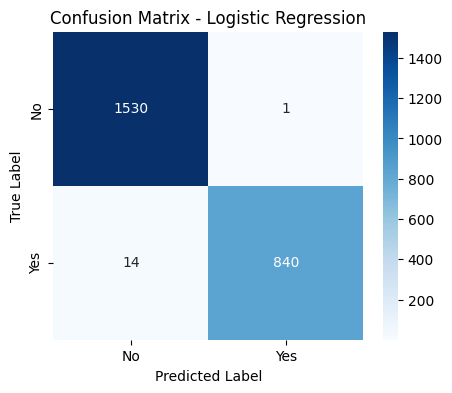


Model: K-Nearest Neighbors
Accuracy: 0.97
Precision: 0.99
Recall: 0.93
F1 Score: 0.96
Confusion Matrix:
[[1525    6]
 [  60  794]]


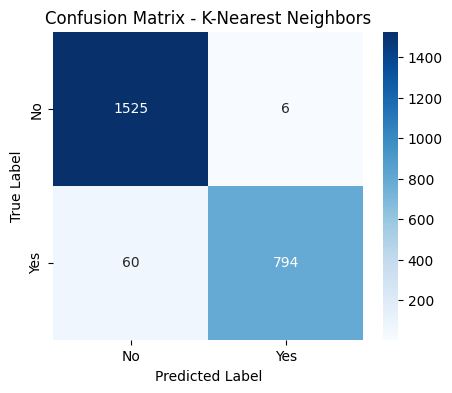


Model: Support Vector Machine (Linear)
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[1528    3]
 [   4  850]]


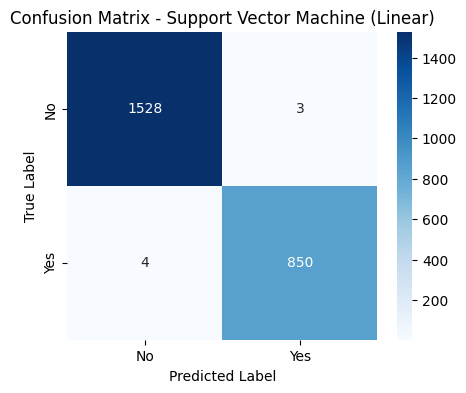


Model: Kernel SVM (RBF)
Accuracy: 0.99
Precision: 1.00
Recall: 0.97
F1 Score: 0.98
Confusion Matrix:
[[1528    3]
 [  25  829]]


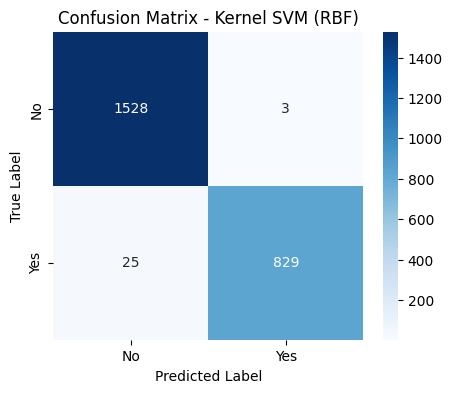


Model: Naïve Bayes
Accuracy: 0.96
Precision: 1.00
Recall: 0.88
F1 Score: 0.94
Confusion Matrix:
[[1531    0]
 [ 101  753]]


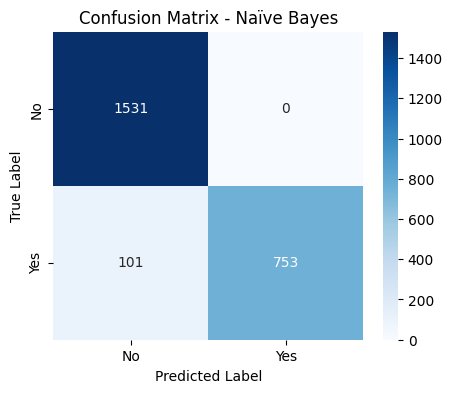


Model: Decision Tree
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[1531    0]
 [   0  854]]


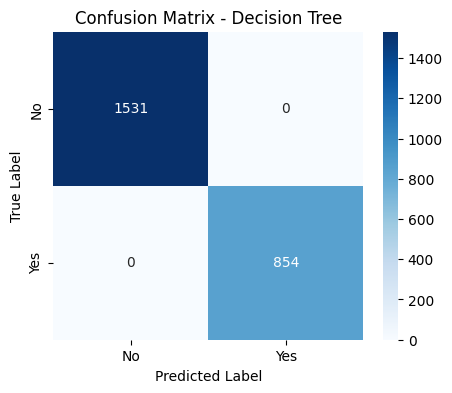


Model: Random Forest
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[1531    0]
 [   0  854]]


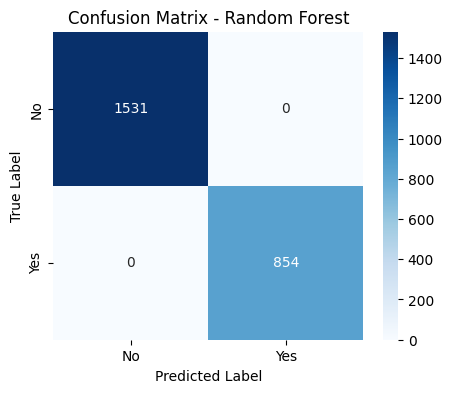

In [9]:
train_and_evaluate_model(LogisticRegression(), "Logistic Regression")
train_and_evaluate_model(KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors")
train_and_evaluate_model(SVC(kernel="linear"), "Support Vector Machine (Linear)")
train_and_evaluate_model(SVC(kernel="rbf"), "Kernel SVM (RBF)")
train_and_evaluate_model(GaussianNB(), "Naïve Bayes")
train_and_evaluate_model(DecisionTreeClassifier(), "Decision Tree")
train_and_evaluate_model(RandomForestClassifier(n_estimators=100), "Random Forest")


# Print final results for all models

In [10]:
print("\nFinal Comparison of Models:")
for model_name, metrics in model_results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        if metric != "Confusion Matrix":
            print(f"{metric}: {value:.2f}")


Final Comparison of Models:

Logistic Regression:
Accuracy: 0.99
Precision: 1.00
Recall: 0.98
F1 Score: 0.99

K-Nearest Neighbors:
Accuracy: 0.97
Precision: 0.99
Recall: 0.93
F1 Score: 0.96

Support Vector Machine (Linear):
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Kernel SVM (RBF):
Accuracy: 0.99
Precision: 1.00
Recall: 0.97
F1 Score: 0.98

Naïve Bayes:
Accuracy: 0.96
Precision: 1.00
Recall: 0.88
F1 Score: 0.94

Decision Tree:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Random Forest:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [11]:
import pickle

# Save the best model (replace with your best model)
best_model = RandomForestClassifier(n_estimators=100)
best_model.fit(X_train, y_train)
pickle.dump(best_model, open('model.pkl', 'wb'))

# Save the scaler
pickle.dump(scaler, open('scaler.pkl', 'wb'))